# Problem set 1: Printing and plotting

**Table of contents**<a id='toc0_'></a>    
- 1. [define function](#toc1_)    
- 2. [print to screen (table)](#toc2_)    
- 3. [write the output to `table_output.txt`](#toc3_)    
- 4. [read `table_output.txt` and print content to screen](#toc4_)    
- 5. [2d plot indifference curves](#toc5_)    
- 6. [3d plots](#toc6_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

Imports you will need:

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import prettytable as pt

from mpl_toolkits.mplot3d import Axes3D # for 3D plots
from matplotlib import cm # for colormap

# predefine options for all plots
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"-"})
plt.rcParams.update({'font.size': 14})

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

**Note:** Answers are in A*.py files.

## 1. <a id='toc1_'></a>[define function](#toc0_)

Implement a Python version of this function:

$$ 
u(x_1,x_2) = (\alpha x_1^{-\beta} + (1-\alpha) x_2^{-\beta})^{-1/\beta} 
$$

where `x1` and `x2` are *positional arguments*, and `alpha`and `beta` are *keyword arguments* with default arguments $\alpha=0.5$ and $\beta=1$.

In [3]:
# Start by defining the function
def u_func(x1, x2, alpha=0.5, beta=1): # x1 and x2 are positional arguments, and alpha and beta are keyword arguments
    # All code following the function definition needs to be indented
    return (alpha * x1**-beta + (1 - alpha) * x2**-beta)**-(1/beta) # Return the formula

In [4]:
# Test if the function works
print(f'The function value of u(2, 1) is {u_func(2,1):.3f}') # Use f-print to print function value

The function value of u(2, 1) is 1.333


## 2. <a id='toc2_'></a>[print to screen (table)](#toc0_)

In [5]:
x1_vec = [1.05,1.3,2.3,2.5,3.1]
x2_vec = [1.05,1.3,2.3,2.5,3.1]

Construct a Python function `gen_table(x1_vec,x2_vec,u_func)` to print values of `u(x1,x2)` in the table form shown below.

In [9]:
# update this code

def gen_table(x1_vec,x2_vec,u_func):
    
    # a. empty text
    text = ''
    
    # b. top header
    text += f'{"":3s}'
    for j, x2 in enumerate(x2_vec):
       text += f'{j:6d}' # Integer with 6 spaces
    text += '\n' # line shift
    
    # c. body
    for i, x1 in enumerate(x1_vec):
        text += f'{i:6d}' # Integer with 6 spaces
        for j, x2 in enumerate(x2_vec):
            text += f'{round(u_func(x1_vec[i], x2_vec[j]),4):6.3f}' # Float with 6 spaces and 3 decimals
        text += '\n' # line shift
        
    # d. print
    return text

table = gen_table(x1_vec,x2_vec, u_func)
print(table)

        0     1     2     3     4
     0 1.050 1.162 1.442 1.479 1.569
     1 1.162 1.300 1.661 1.710 1.832
     2 1.442 1.661 2.300 2.396 2.641
     3 1.479 1.710 2.396 2.500 2.768
     4 1.569 1.832 2.641 2.768 3.100



In [6]:
from A1 import u_func as u_func_answer
from A2 import gen_table as gen_table_answer
print(gen_table_answer(x1_vec,x2_vec,u_func_answer))

2.4000000000000004
        0     1     2     3     4
  0  1.050 1.162 1.442 1.479 1.569
  1  1.162 1.300 1.661 1.711 1.832
  2  1.442 1.661 2.300 2.396 2.641
  3  1.479 1.711 2.396 2.500 2.768
  4  1.569 1.832 2.641 2.768 3.100


In [ ]:
import pandas as pd
# Write to dataframe
df = pd.DataFrame(data={'u': [u_func(x1,x2) for x1 in x1_vec for x2 in x2_vec]})

# Create 5 by 5 matrix
u_matrix = df.values.reshape(5,5)

# Rewrite to dataframe
df = pd.DataFrame(data=u_matrix)

df

,0,1,2,3,4
0,1.050000,1.161702,1.441791,1.478873,1.568675
1,1.161702,1.300000,1.661111,1.710526,1.831818
2,1.441791,1.661111,2.300000,2.395833,2.640741
3,1.478873,1.710526,2.395833,2.500000,2.767857
4,1.568675,1.831818,2.640741,2.767857,3.100000


## 3. <a id='toc3_'></a>[write the output to `table_output.txt`](#toc0_)

In [12]:
with open('table_output.txt', 'w') as f: # open a file for writing
    f.write(f'{gen_table(x1_vec,x2_vec,u_func)}')

## 4. <a id='toc4_'></a>[read `table_output.txt` and print content to screen](#toc0_)

In [16]:
with open('table_output.txt', 'r') as f: # open a file for reading
    print(f.read())


        0     1     2     3     4
     0 1.050 1.162 1.442 1.479 1.569
     1 1.162 1.300 1.661 1.710 1.832
     2 1.442 1.661 2.300 2.396 2.641
     3 1.479 1.710 2.396 2.500 2.768
     4 1.569 1.832 2.641 2.768 3.100



## 5. <a id='toc5_'></a>[2d plot indifference curves](#toc0_)

The formula for the indifference curves of $u(x_1,x_2)$ is:

$$
x_2(x_1, u) = \left( \frac{u^{-\beta} - \alpha x_1^{-\beta}}{1-\alpha} \right)^{-1/\beta}
$$

for 

$$
\log(x_1) > \log(u) + \log(\alpha)/\beta
$$

Produce a figure like the one below and save to disc.

<Figure size 1000x600 with 0 Axes>

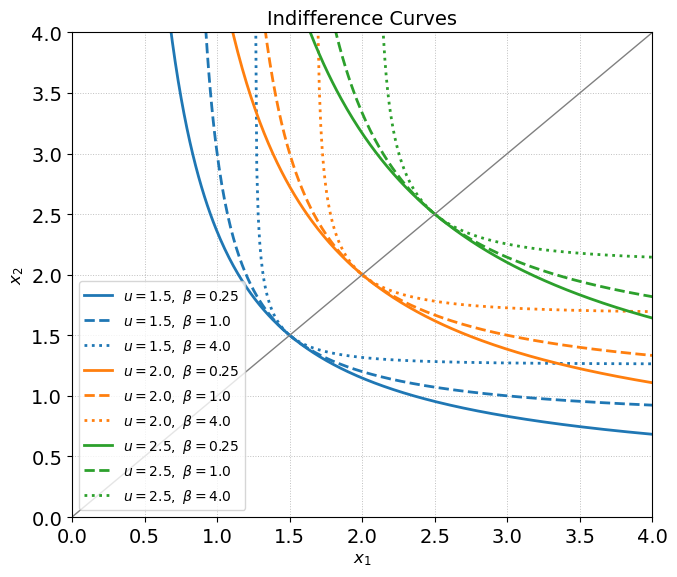

In [9]:
# these values were used
alpha = 0.5
betas = [0.25, 1.0, 4.0]
uvals = [1.5, 2.0, 2.5]
x1_vals = np.linspace(0, 4, 400)

# Define the function
def x2_func(x1, u, alpha=0.75, beta=0.5):
    return (u / (x1 ** alpha)) ** (1.0 / beta)

# Create a for loop to compute results
results = {}

for u in uvals:
        for beta in betas:
            x2_list = []
            for x1 in x1_vals:
                # Ensure valid domain
                if x1 > 0 and np.log(x1) > (np.log(u) + np.log(alpha)/beta):
                    num = u**-beta - alpha * x1**-beta
                    denom = 1 - alpha
                    x2 = (num/denom)**(-1/beta)
                else:
                    x2 = np.nan
                x2_list.append(x2)
            
            results[(u, beta)] = np.array(x2_list)

# Compute results
x2_results = results

# Plot figure
plt.figure(figsize=(10, 6))

# Define style maps
colors = {1.5: "tab:blue", 2.0: "tab:orange", 2.5: "tab:green"}
linestyles = {0.25: "-", 1.0: "--", 4.0: ":"}

plt.figure(figsize=(7, 6))

# Plot all curves
for (u, beta), x2_vals in x2_results.items():
    plt.plot(
        x1_vals, x2_vals,
        color=colors[u],
        linestyle=linestyles[beta],
        linewidth=2,
        label=fr"$u={u}, \ \beta={beta}$"
    )

# Add 45-degree line
plt.plot([0, 4], [0, 4], color="gray", linestyle="-", linewidth=1)

# Labels & formatting
plt.xlim(0, 4)
plt.ylim(0, 4)
plt.xlabel(r"$x_1$", fontsize=12)
plt.ylabel(r"$x_2$", fontsize=12)
plt.title("Indifference Curves", fontsize=14)

# Clean legend (group by color and linestyle)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # remove duplicates
plt.legend(by_label.values(), by_label.keys(), fontsize=10)

plt.grid(True, linestyle=":", linewidth=0.7)
plt.tight_layout()
plt.show()

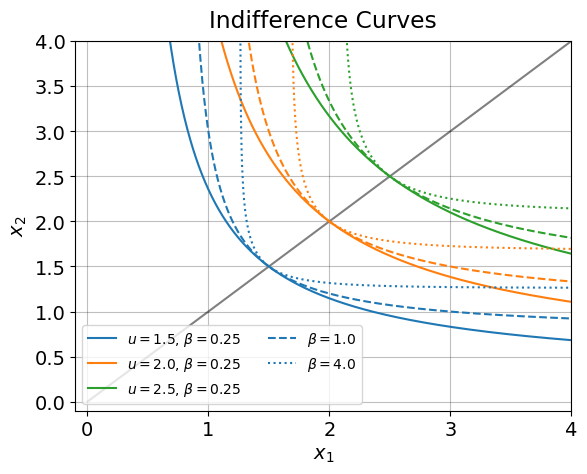

In [10]:
import A5
A5.plot(alpha,betas,uvals)

**Hint:** To check your implementation of `x2(x1,u,alpha,beta)` you can use the code below.

In [11]:
# x1_ = 2.0
# x2_ = 1.5
# u_ = u_func(x1_,x2_,alpha=alpha,beta=betas[0])
# x2_implied = x2_func(x1_,u_,alpha=alpha,beta=betas[0])
# assert np.isclose(x2_,x2_implied)

## 6. <a id='toc6_'></a>[3d plot of utility function](#toc0_)

Reproduce the figures below of $u(x_1,x_2)$ using:

1. the `meshgrid` function from *numpy* 
1. the `.plot_countour`, `.plot_surface` and `.plot` axis methods from *matplotlib*.

where the black lines are indifference curves for $u \in \{1,2,3\}$.

**Hint:** You can look at the documentation.

In [12]:
#?np.meshgrid

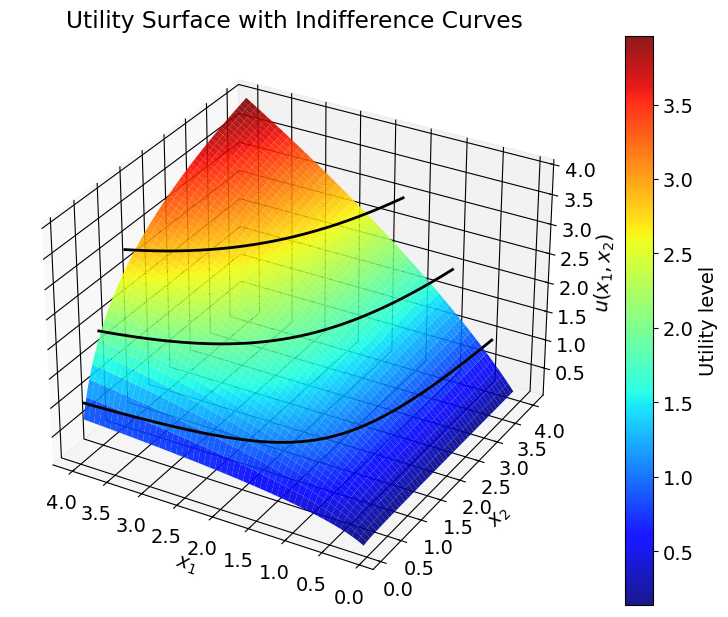

In [ ]:
# Functions again 
def plot_surface_with_indifference(x1_vec, x2_vec, alpha, beta, uvals):
    # Grid + surface values
    x1_grid, x2_grid = np.meshgrid(x1_vec, x2_vec, indexing='ij')
    u_grid = u_func(x1_grid, x2_grid, alpha=alpha, beta=beta)

    # Plot 3D surface
    fig = plt.figure(figsize=(9, 6))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    h = ax.plot_surface(x1_grid, x2_grid, u_grid, cmap=cm.jet, edgecolor='none', alpha=0.9)
    fig.colorbar(h, label='Utility level')

    # Indifference curves as 3D polylines at z = uval
    x2_min, x2_max = float(x2_vec[0]), float(x2_vec[-1])
    for uval in uvals:
        # Compute the full curve then clip to plotting window
        x2_curve = x2_func(x1_vec, uval, alpha=alpha, beta=beta)
        keep = (x2_curve >= x2_min) & (x2_curve <= x2_max) & np.isfinite(x2_curve)

        ax.plot(
            x1_vec[keep], x2_curve[keep],
            uval * np.ones_like(x2_curve[keep]),
            lw=2, color='black', zorder=99, label=None
        )

    # Formatting
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_zlabel(r'$u(x_1,x_2)$')
    ax.set_title('Utility Surface with Indifference Curves')
    ax.invert_xaxis()               # matches your teacher's view
    fig.tight_layout(pad=0.1)
    plt.show()

# Run the function
alpha = 0.75
beta  = 0.5
x1_vec = np.linspace(0.1, 4, 1000)
x2_vec = np.linspace(0.1, 4, 1000)
uvals  = [1.0, 2.0, 3.0]

plot_surface_with_indifference(x1_vec, x2_vec, alpha, beta, uvals)

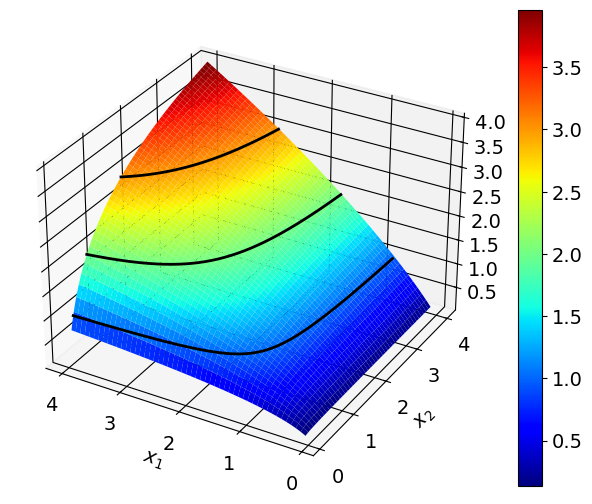

In [14]:
import A6
A6.plot(x1_vec,x2_vec,alpha,beta,uvals)